In [2]:
import pandas as pd

# Load the dataset from an Excel file
data = pd.read_excel('Online_Retail_Categorized.xlsx', engine='openpyxl')

# Inspect the data
print(data.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom   

                    Category  
0           Home and kitchen  
1         Garden and outdoor  
2           Home and kitchen  
3     Arts, crafts, & sewing  
4  Clothing, shoes & jewelr

In [3]:
print(data.isnull().sum())  # Check for null values


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Category       1
dtype: int64


In [4]:
# Drop rows with missing values in 'Description' and 'CustomerID'
data = data.dropna(subset=['Description', 'CustomerID', 'Category'])

# Check if any missing values remain
print(data.isnull().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Category       0
dtype: int64


In [16]:
import pandas as pd

# Load your data
data = pd.read_excel('Online_Retail_Categorized.xlsx', engine='openpyxl')

# Remove any rows with missing CustomerID or Category (optional)
data = data.dropna(subset=['CustomerID', 'Category'])

# Create a transaction matrix where each row is a customer and each column is a category
customer_category_matrix = data.groupby(['CustomerID', 'Category'])['Quantity'].sum().unstack().reset_index().fillna(0)

# Convert the 'Quantity' values to 1 (if purchased) or 0 (if not purchased)
customer_category_matrix = customer_category_matrix.applymap(lambda x: 1 if x > 0 else 0)

# Drop the CustomerID column for association rule mining
customer_category_matrix = customer_category_matrix.drop('CustomerID', axis=1)

# Display the customer-category matrix
#print(customer_category_matrix.head())


from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.05
frequent_itemsets = apriori(customer_category_matrix, min_support=0.05, use_colnames=True)

# Generate association rules based on Lift, with a minimum threshold of 1.0
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3, num_itemsets= 2)

# Display the association rules
rules







/var/folders/f2/1t0fmkl56p5_5p_tylgtrrqw0000gn/T/ipykernel_21795/1959630930.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer_category_matrix = customer_category_matrix.applymap(lambda x: 1 if x > 0 else 0)
/opt/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(Fine art, DIY and tools)",(Gift cards),0.081633,0.204082,0.051020,0.625000,3.062500,1.0,0.034361,2.122449,0.733333,0.217391,0.528846,0.437500
1,(Gift cards),"(Fine art, DIY and tools)",0.204082,0.081633,0.051020,0.250000,3.062500,1.0,0.034361,1.224490,0.846154,0.217391,0.183333,0.437500
2,"(Arts, crafts, & sewing, Fine art, DIY and tools)",(Gift cards),0.081633,0.204082,0.051020,0.625000,3.062500,1.0,0.034361,2.122449,0.733333,0.217391,0.528846,0.437500
3,"(Gift cards, Arts, crafts, & sewing)","(Fine art, DIY and tools)",0.193878,0.081633,0.051020,0.263158,3.223684,1.0,0.035194,1.246356,0.855696,0.227273,0.197661,0.444079
4,"(Fine art, DIY and tools)","(Gift cards, Arts, crafts, & sewing)",0.081633,0.193878,0.051020,0.625000,3.223684,1.0,0.035194,2.149660,0.751111,0.227273,0.534810,0.444079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,"(Fine art, Clothing, shoes & jewelry)","(Home and kitchen, Gift cards, Arts, crafts, &...",0.158163,0.122449,0.061224,0.387097,3.161290,1.0,0.041858,1.431794,0.812121,0.279070,0.301575,0.443548
164,"(Home and kitchen, Gift cards)","(Arts, crafts, & sewing, Garden and outdoor, F...",0.204082,0.096939,0.061224,0.300000,3.094737,1.0,0.041441,1.290087,0.850427,0.255319,0.224859,0.465789
165,"(Gift cards, Garden and outdoor)","(Home and kitchen, Arts, crafts, & sewing, Fin...",0.127551,0.137755,0.061224,0.480000,3.484444,1.0,0.043654,1.658163,0.817251,0.300000,0.396923,0.462222
166,"(Gift cards, Arts, crafts, & sewing)","(Home and kitchen, Garden and outdoor, Fine ar...",0.193878,0.102041,0.061224,0.315789,3.094737,1.0,0.041441,1.312402,0.839662,0.260870,0.238038,0.457895


In [17]:
# Filter and display rules with high lift and confidence for product bundling
high_lift_rules = rules[(rules['lift'] > 1.5) & (rules['confidence'] > 0.8)]
print(high_lift_rules[['antecedents', 'consequents', 'lift', 'confidence']])


                                           antecedents  \
14                               (DIY and tools, Toys)   
42       (DIY and tools, Arts, crafts, & sewing, Toys)   
44                               (DIY and tools, Toys)   
84             (Home and kitchen, DIY and tools, Toys)   
88                               (DIY and tools, Toys)   
132  (Home and kitchen, DIY and tools, Arts, crafts...   
135            (Home and kitchen, DIY and tools, Toys)   
141      (DIY and tools, Arts, crafts, & sewing, Toys)   
144                              (DIY and tools, Toys)   

                                           consequents      lift  confidence  
14     (Garden and outdoor, Clothing, shoes & jewelry)  3.145679    0.866667  
42     (Garden and outdoor, Clothing, shoes & jewelry)  3.145679    0.866667  
44   (Arts, crafts, & sewing, Garden and outdoor, C...  3.330719    0.866667  
84     (Garden and outdoor, Clothing, shoes & jewelry)  3.145679    0.866667  
88   (Home and kitchen, 

In [18]:
product_bundles = rules[(rules['confidence'] > 0.8) & (rules['lift'] > 1.5)]
print(product_bundles[['antecedents', 'consequents', 'lift', 'confidence']])


                                           antecedents  \
14                               (DIY and tools, Toys)   
42       (DIY and tools, Arts, crafts, & sewing, Toys)   
44                               (DIY and tools, Toys)   
84             (Home and kitchen, DIY and tools, Toys)   
88                               (DIY and tools, Toys)   
132  (Home and kitchen, DIY and tools, Arts, crafts...   
135            (Home and kitchen, DIY and tools, Toys)   
141      (DIY and tools, Arts, crafts, & sewing, Toys)   
144                              (DIY and tools, Toys)   

                                           consequents      lift  confidence  
14     (Garden and outdoor, Clothing, shoes & jewelry)  3.145679    0.866667  
42     (Garden and outdoor, Clothing, shoes & jewelry)  3.145679    0.866667  
44   (Arts, crafts, & sewing, Garden and outdoor, C...  3.330719    0.866667  
84     (Garden and outdoor, Clothing, shoes & jewelry)  3.145679    0.866667  
88   (Home and kitchen, 

In [19]:
for idx, row in product_bundles.iterrows():
    print(f"Bundle Recommendation: Buy {list(row['antecedents'])} with {list(row['consequents'])}")


Bundle Recommendation: Buy ['DIY and tools', 'Toys'] with ['Garden and outdoor', 'Clothing, shoes & jewelry']
Bundle Recommendation: Buy ['DIY and tools', 'Arts, crafts, & sewing', 'Toys'] with ['Garden and outdoor', 'Clothing, shoes & jewelry']
Bundle Recommendation: Buy ['DIY and tools', 'Toys'] with ['Arts, crafts, & sewing', 'Garden and outdoor', 'Clothing, shoes & jewelry']
Bundle Recommendation: Buy ['Home and kitchen', 'DIY and tools', 'Toys'] with ['Garden and outdoor', 'Clothing, shoes & jewelry']
Bundle Recommendation: Buy ['DIY and tools', 'Toys'] with ['Home and kitchen', 'Garden and outdoor', 'Clothing, shoes & jewelry']
Bundle Recommendation: Buy ['Home and kitchen', 'DIY and tools', 'Arts, crafts, & sewing', 'Toys'] with ['Garden and outdoor', 'Clothing, shoes & jewelry']
Bundle Recommendation: Buy ['Home and kitchen', 'DIY and tools', 'Toys'] with ['Arts, crafts, & sewing', 'Garden and outdoor', 'Clothing, shoes & jewelry']
Bundle Recommendation: Buy ['DIY and tools', '

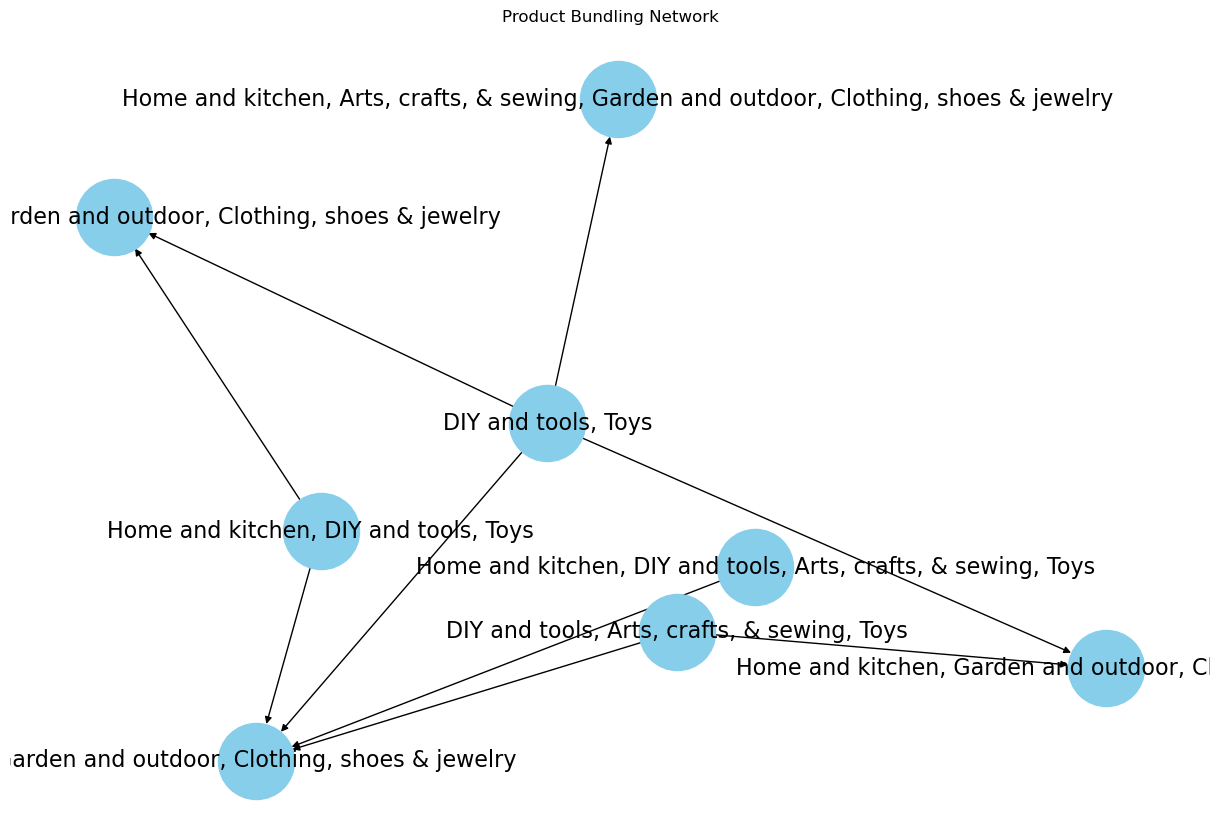

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.DiGraph()

# Add edges based on association rules
for idx, row in product_bundles.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['lift'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=2)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=16)
plt.title("Product Bundling Network")
plt.show()
